#**Hope to Skills - Free AI Course**
##**Shifa Zahra Assignment 10**

##**Installing Required Liabraries**##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [4]:
full_data = pd.read_csv('/content/diabetes.csv')

**Data Shape**  
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains.  

In [5]:
# Data shape
print(full_data.shape)

(768, 9)


In [6]:
# View first few rows
full_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<a id = "Distribution"></a>
## 2. Distribution plots
Distribution of data is the foremost thing that we need to understand while analysing the data. Here, we will see how seaborn helps us in understanding the distribution of our data.

<a id = "distplot"></a>
### 2.1. distplot

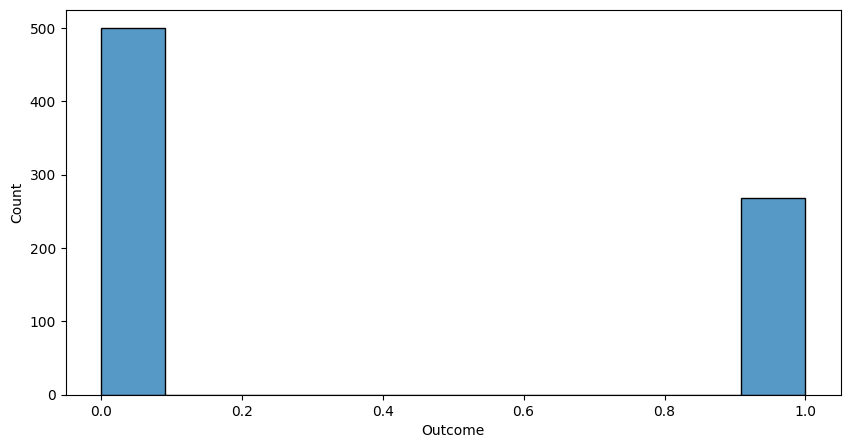

In [ ]:
sns.histplot(full_data['Outcome'],kde=False)
plt.show()

Imbalance in Data: There is a significant imbalance in the data, with the outcome 0.0 occurring much more frequently than outcome 1.0.

### 2.2. kdeplot

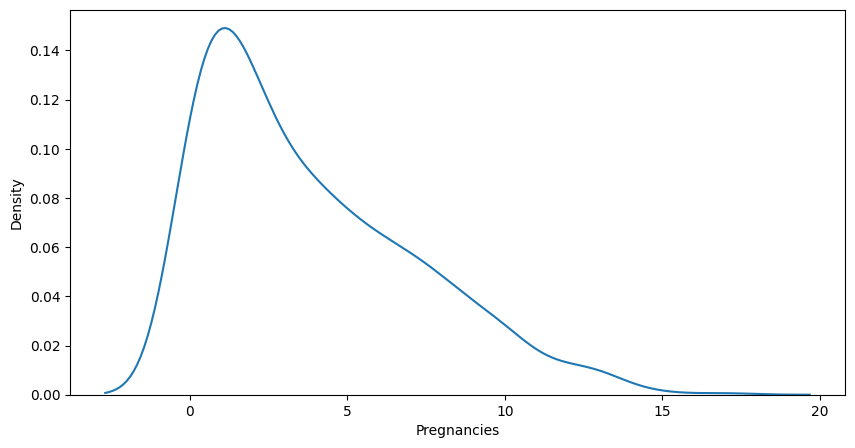

In [ ]:
sns.distplot(full_data['Pregnancies'], hist=False)
plt.show()

The peak (mode) of the distribution is around 1-2 pregnancies, indicating that the most common number of pregnancies in the dataset is between 1 and 2.

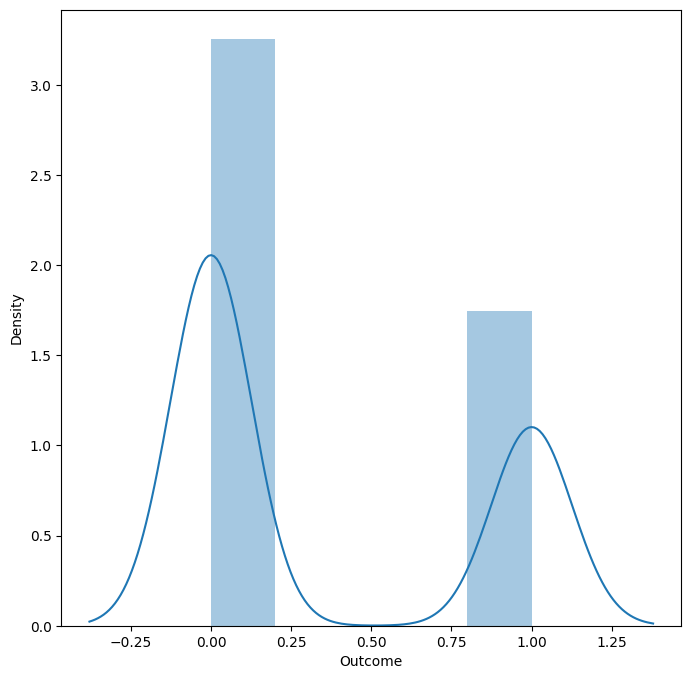

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(full_data['Outcome'])
plt.show()

The peak around 0 is higher than the peak around 1, indicating that there are more non-diabetic cases than diabetic cases in the dataset. This suggests an imbalance in the dataset, with more instances of non-diabetic outcomes compared to diabetic outcomes.

** **
<a id = "Relational"></a>
## 3. Relational plots

<a id = "relplot"></a>
### 3.1. relplot

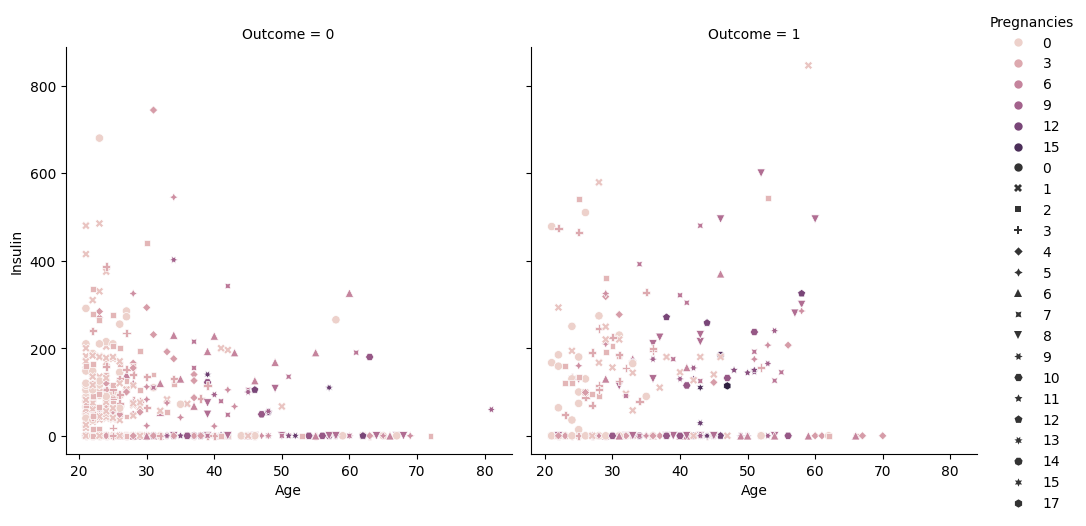

In [ ]:
sns.relplot(x="Age", y="Insulin", col="Outcome", hue="Pregnancies", style="Pregnancies", kind="scatter", data=full_data)
plt.show()

For the non-diabetic group (Outcome = 0), there are some outliers with very high insulin levels (up to 800).
The diabetic group (Outcome = 1) also has outliers, but fewer instances with extremely high insulin levels compared to the non-diabetic group.

<a id = "scatterplot"></a>
### 3.2. scatterplot
**Scatter plot** is the most convenient way to visualize the distribution where each observation is represented in two -dimensional plot via x and y axis.

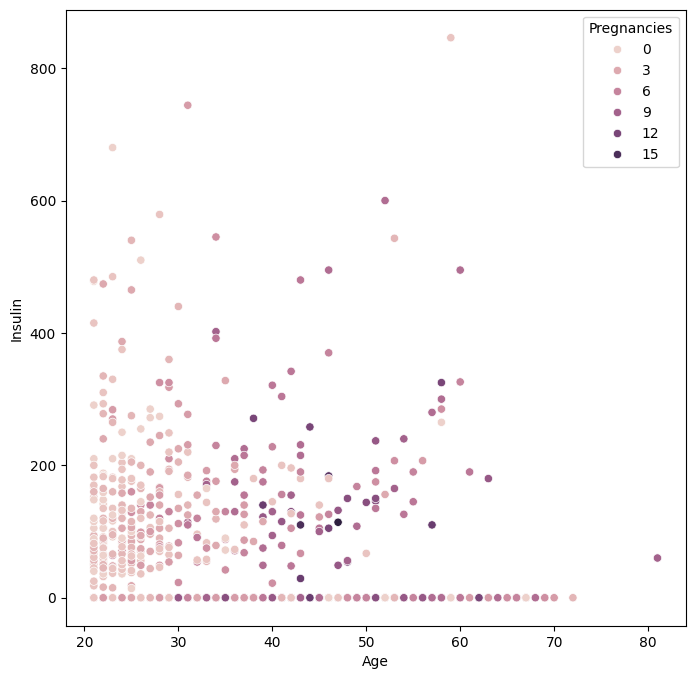

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Insulin", hue="Pregnancies", data=full_data)
plt.show()

There seems to be a cluster of data points where individuals with fewer pregnancies (lighter colors) have lower insulin levels.
As the number of pregnancies increases (darker colors), there are individuals with higher insulin levels, but this is not a consistent trend across all ages.

**Outliers:**
There are some outliers with extremely high insulin levels.

To avoid the overlapping of the points, we can use the `jitter` to add some random noise to the data. This parameter will adjust the positions along the categorical axis. But Another option which can be used as an alternate to `‘Jitter’` is function `swarmplot()`.

<a id = "swarmplot"></a>
### 4.3. swarmplot

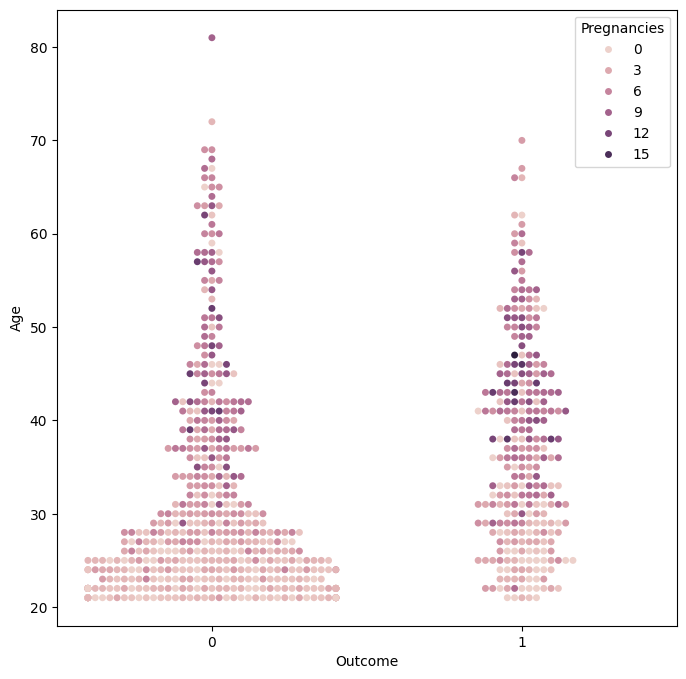

In [ ]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Outcome", y="Age",hue='Pregnancies', data=full_data)
plt.show()

**Outcome 0 (No Diabetes):**

The age distribution for individuals without diabetes is relatively spread out from 20 to about 70, with a noticeable peak around ages 30-40.
**Outcome 1 (Diabetes):**

For individuals with diabetes, the age distribution shows a peak around 40-50 years.

### 4.4. boxplot

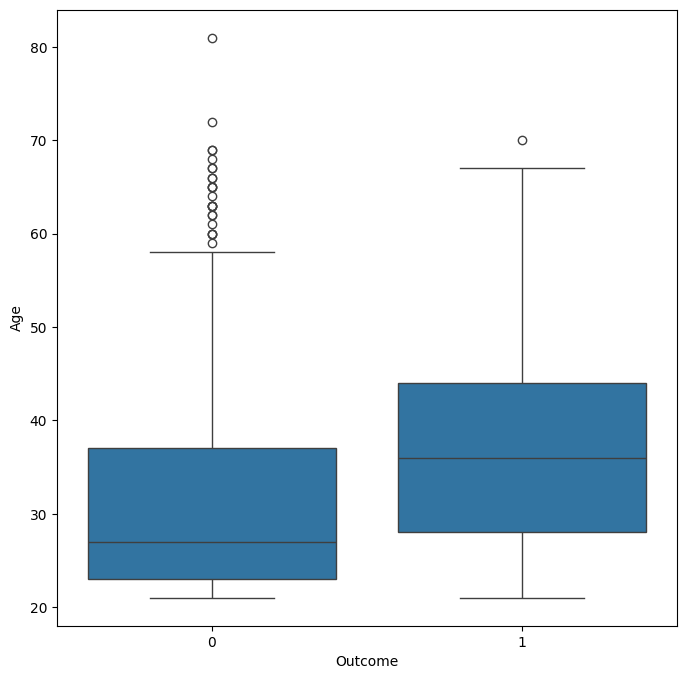

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Outcome", y="Age", data=full_data)
plt.show()

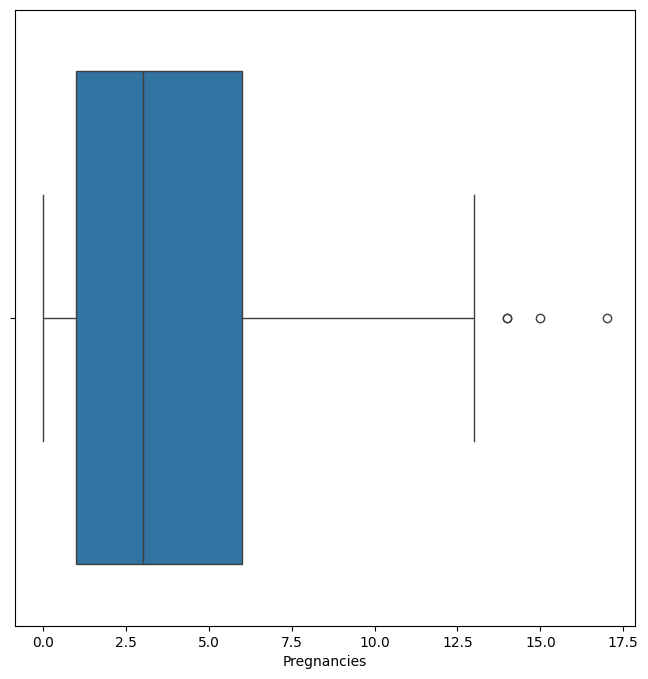

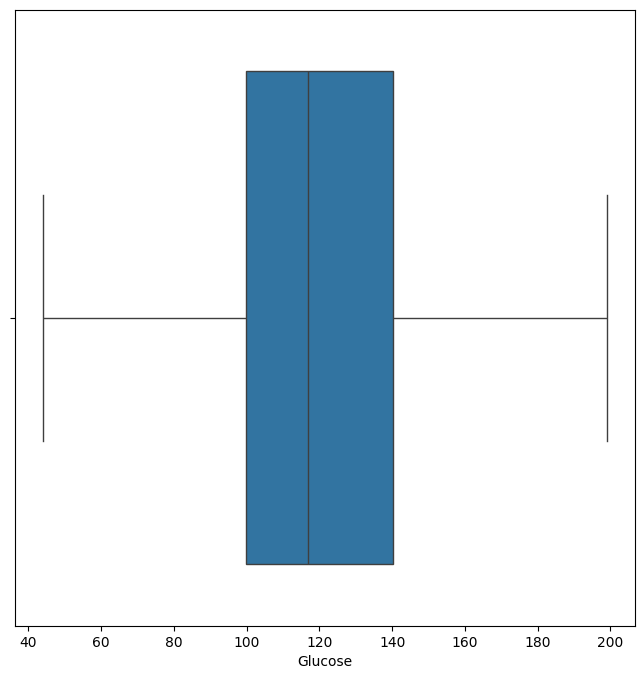

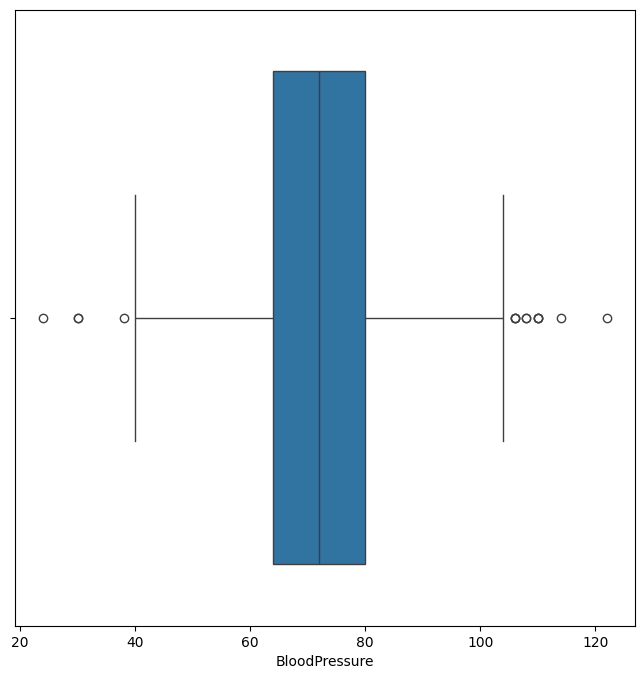

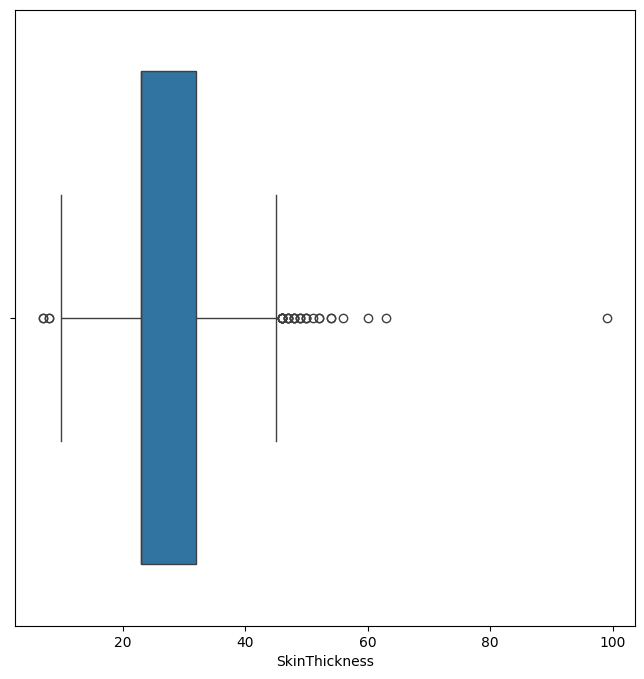

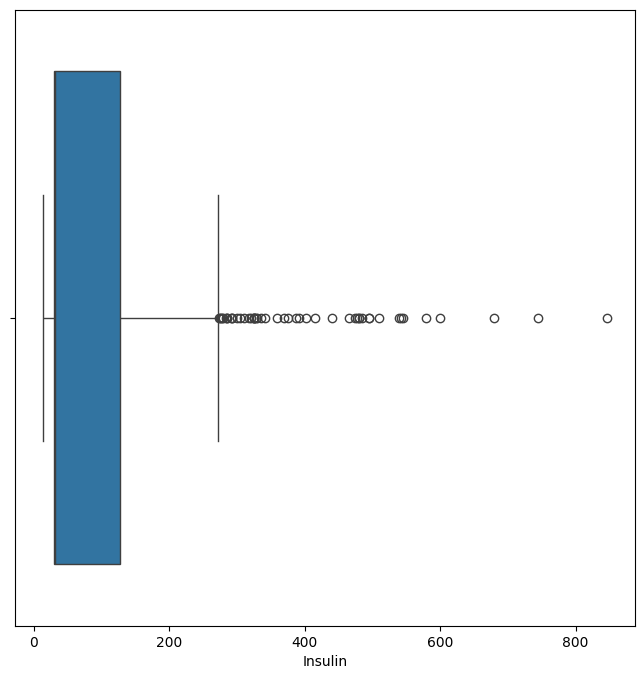

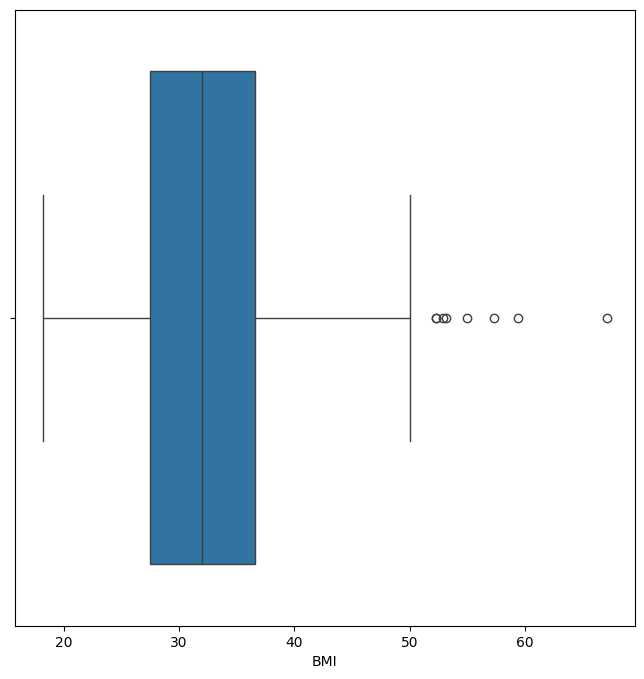

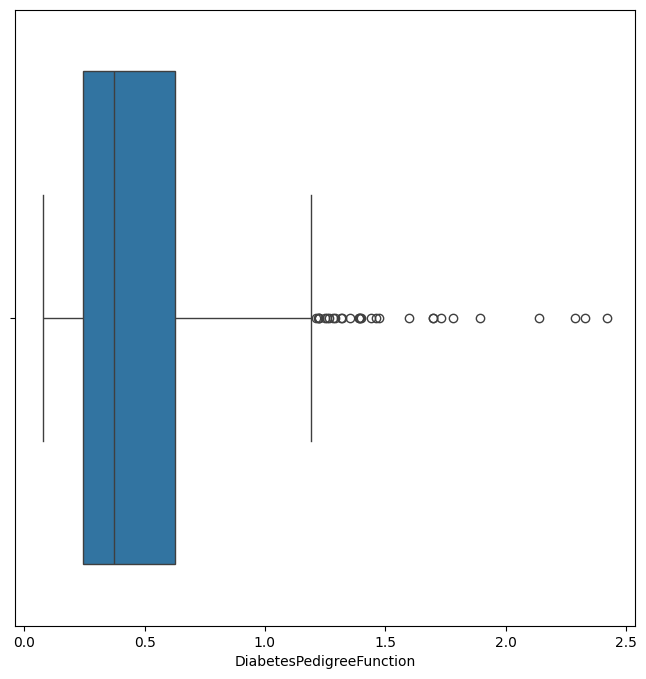

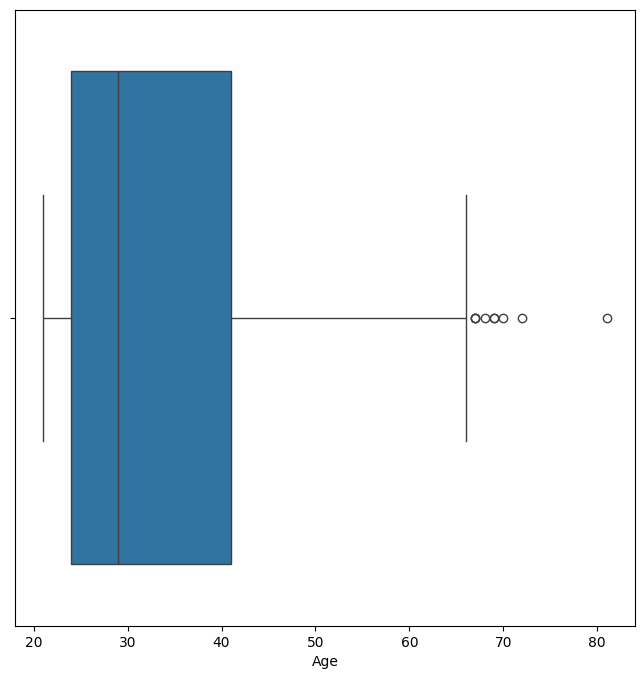

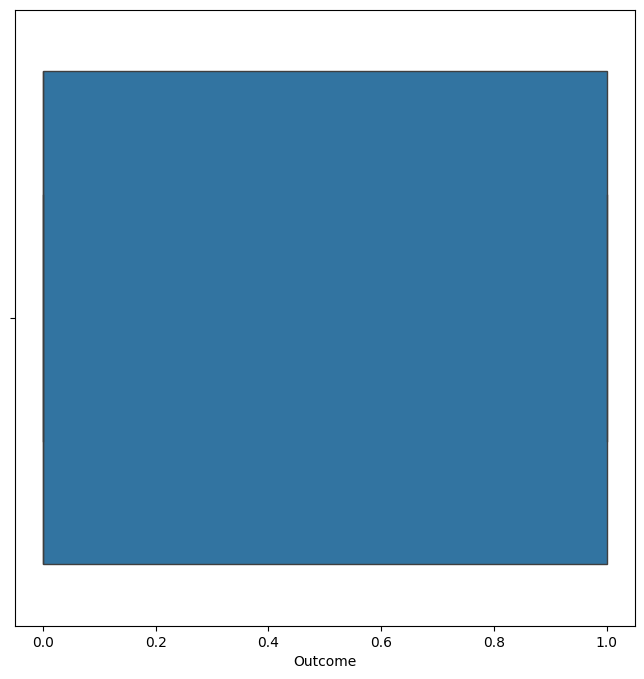

In [ ]:
for c in full_data.columns:
 plt.figure(figsize=(8,8))
 sns.boxplot(x=c, data=full_data)

**Age Distribution for Outcome 0 (No Diabetes):**
Outliers: There are a significant number of outliers aged between 50 and 70+ years.

**Age Distribution for Outcome 1 (Diabetes):**
The age range extends from about 21 to 67 years, with fewer outliers compared to the non-diabetic group.

### 4.5. violinplot
**Violin Plots** are a combination of the **box plot** with the **kernel density estimates**. So, these plots are easier to analyze and understand the distribution of the data.

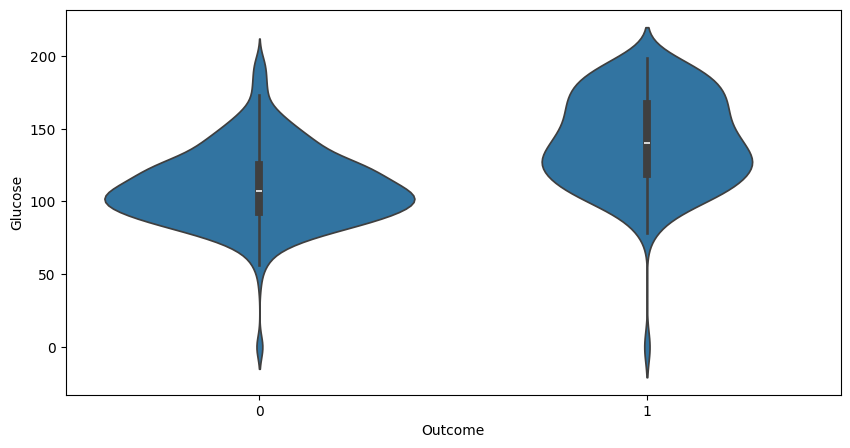

In [ ]:
sns.violinplot(x="Outcome", y="Glucose", data=full_data)
plt.show()

The quartile and whisker values from the boxplot are shown inside the violin. As the violin plot uses KDE, the wider portion of violin indicates the higher density and narrow region represents relatively lower density. The Inter-Quartile range in boxplot and higher density portion in kde fall in the same region of each category of violin plot.

<a id = "countplot"></a>
### 4.6. countplot
A special case in **barplot** is to show the no of observations in each category rather than computing a statistic for a second variable. For this, we use `countplot()`.


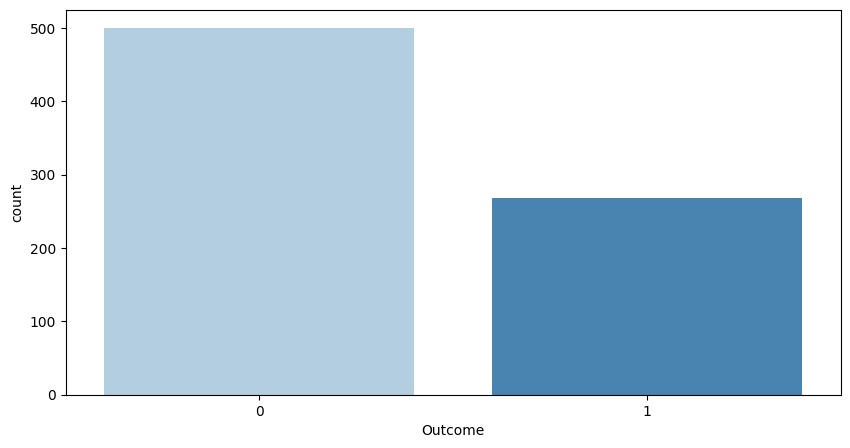

In [ ]:
sns.countplot(x="Outcome", data=full_data, palette="Blues");
plt.show()

Almost 280 persons suffer from diabetics but majority not suffering from diabetes

**Age Distribution for Outcome 0 (No Diabetes):**
Outliers: There are a significant number of outliers aged between 50 and 70+ years.

**Age Distribution for Outcome 1 (Diabetes):**
The age range extends from about 21 to 67 years, with fewer outliers compared to the non-diabetic group.

## 6. Matrix plots

<a id = "heatmap"></a>
### 6.1. heatmap

Visualizing data with **heatmaps** is a great way to do exploratory data analysis, when you have a data set with multiple variables. Heatmaps can reveal general pattern in the dataset, instantly. And it is very easy to make beautiful heatmaps with Seaborn library in Python.

Now let's plot the correlation matrix of our data with a heatmap.

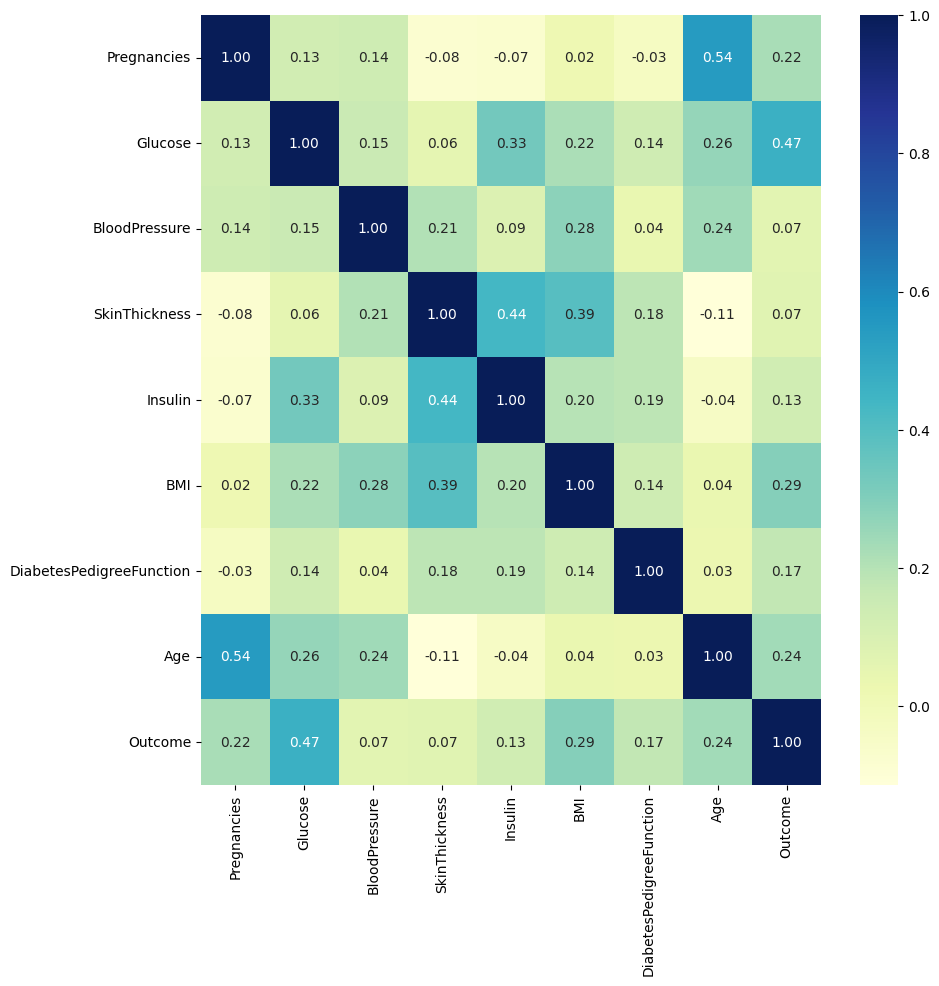

In [ ]:
plt.subplots(figsize=(10, 10))
sns.heatmap(full_data.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

Correlation between **(Age and Pregnacies), (SkinThickness and Insulin) ,(Gulucose and Outcome)** are strong

#### **FacetGrid.map**
The main approach for visualizing data on this grid is with the `FacetGrid.map()` method.

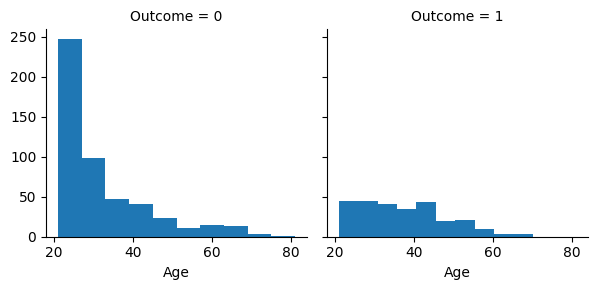

In [ ]:
# initialize the FacetGrid object
g = sns.FacetGrid(full_data, col='Outcome')

g.map(plt.hist, 'Age')
g.add_legend()
plt.show()

Younger Indivisuals more likely to have **No Diabetes (Outcome=0)** on the other hand Older Indivisuals more likely to have **Diabetes (Outcome=1)**

##Data Cleaning

In [ ]:
full_data.shape

(768, 9)

In [ ]:
full_data = full_data.drop_duplicates()

In [ ]:
full_data.shape

(768, 9)

So , no dupliacte data is present in dataset

**For each of these columns, the code is checking for any zero values.
If a zero value is found, it is replaced with the median of that column.**

In [ ]:
# Replacing zero values with median of that column
full_data['Glucose'] = full_data['Glucose'].replace(0,full_data['Glucose'].median())
full_data['BloodPressure'] = full_data['BloodPressure'].replace(0,full_data['BloodPressure'].median())
full_data['SkinThickness'] = full_data['SkinThickness'].replace(0,full_data['SkinThickness'].median())
full_data['Insulin'] = full_data['Insulin'].replace(0,full_data['Insulin'].median())
full_data['BMI'] = full_data['BMI'].replace(0,full_data['BMI'].median())

d. Select the target variable and clearly mention the reason for selecting it.

>Now the train data is perfect for a machine learning algorithm:  
- all the data is numeric

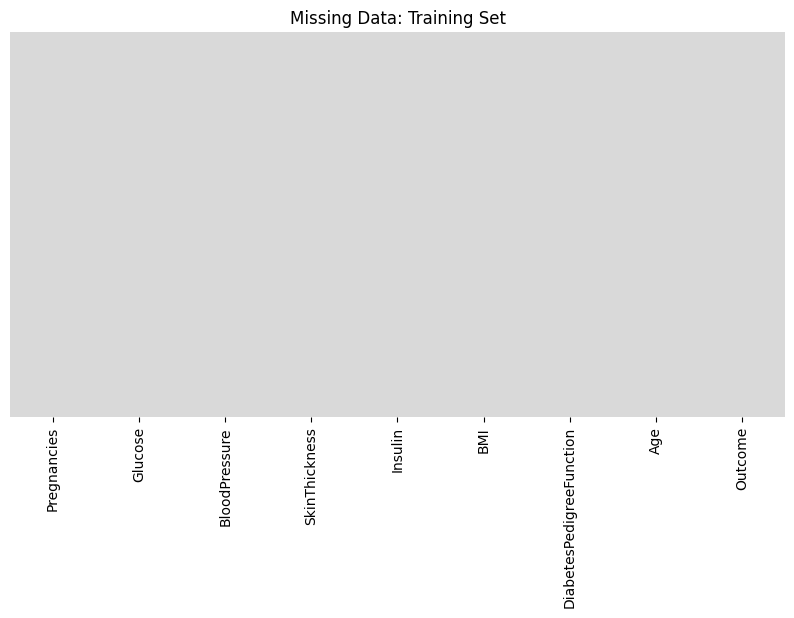

In [ ]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [7]:
full_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we can see there is no missing data. but from EDA we can notice some outliers and Data Imblance issues

## **d. Select the target variable and clearly mention the reason for selecting it**

The target variable is **Outcome** as it indicates whether the individual is diabetic (1) or not (0).We are interested in Predicting whether a patient has Diabetes so here Target Variable Outcome is a good choice. The Target variable is also Binary, It means it can take only 0 & 1. This is important because many machine learning algorithms can handle Binary Traget variables.

## **Transform the Dataset**
**i. Transform the whole dataset (Features , Target Variable)**

In [8]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Outcome', axis = 1) # grabs everything else but 'Outcome'

# Create target variable
y = full_data['Outcome'] # y is the column we're trying to predict

In [9]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [28]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("---"*10)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (614, 8)
Shape of y_train:  (614,)
------------------------------
Shape of x_test:  (154, 8)
Shape of y_test:  (154,)


# **1. LOGISTIC REGRESSION**

## **Model Training**

In [11]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

## **Model Evaluation**
**Logistic regression**

In [12]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 79.87 %


Precision: 0.72
Recall: 0.65
------------------------------------------------------------
[[90 13]
 [18 33]]


<Axes: >

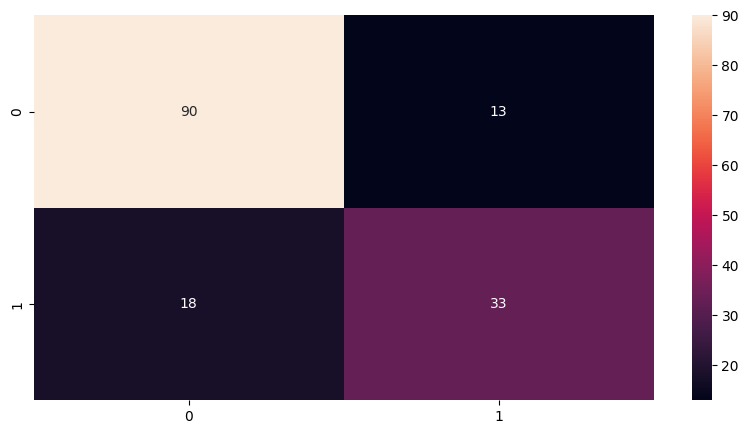

In [13]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

# **2. Decision Tree**

## **Model Training**

In [14]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)


Decision Tree Classifier


DecisionTreeClassifier()

## **Model Evalution**
**Decision Tree Classifier**

In [15]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 68.83 %


Precision: 0.53
Recall: 0.53
------------------------------------------------------------


<Axes: >

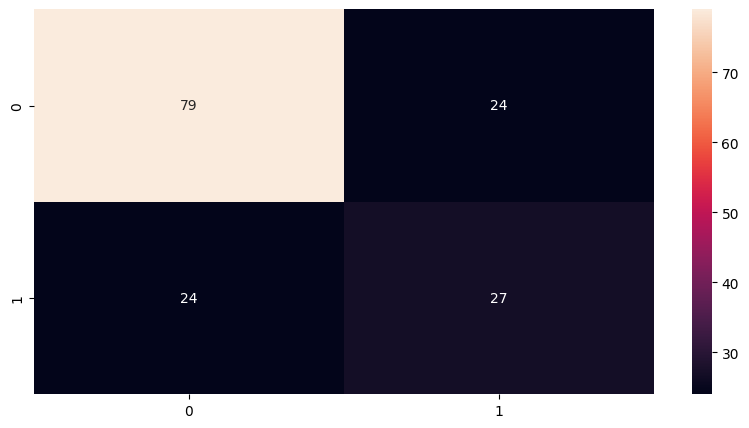

In [16]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)

sns.heatmap(confusion, annot=True, fmt="d")

# **3. Random Forest**

## **Model Training**

In [17]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)


Random Forest Classifier


RandomForestClassifier()

## **Model Evaluation**
**Random Forest**

In [18]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 77.27 %


Precision: 0.67
Recall: 0.61
------------------------------------------------------------


<Axes: >

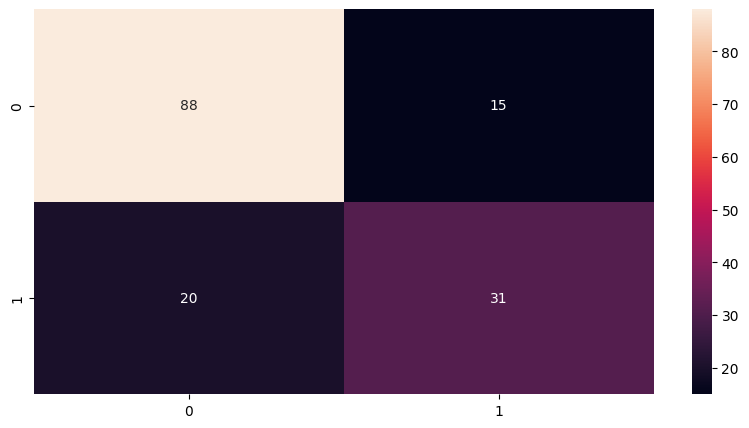

In [19]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

# **4. Gradient Bossting Classifier**

## **Model Training**

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)


Gradient Boosting Classifier


GradientBoostingClassifier()

## **Model Evalution**
**Gradient Boosting**

In [21]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(x_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 76.62 %


Precision: 0.65
Recall: 0.65
------------------------------------------------------------


<Axes: >

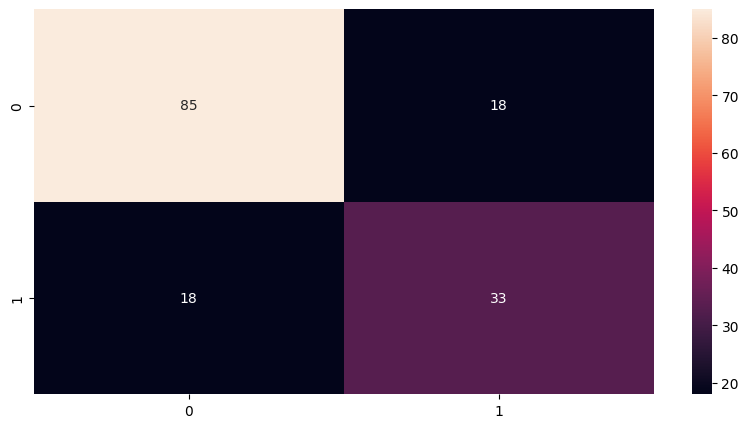

In [22]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(confusion, annot=True, fmt="d")

In [24]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": 79.87,
    "Decision Tree Classifier": 68.83,
    "Random Forest Classifier": 77.27,
    "Gradient Boosting Classifier": 76.62
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (Greater Values are better):
1. Logistic Regression: 79.87
2. Random Forest Classifier: 77.27
3. Gradient Boosting Classifier: 76.62
4. Decision Tree Classifier: 68.83


In [25]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [34]:
x_transform.shape
x_transform

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [33]:
y.shape

(768,)

In [35]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 101)

# **1. LOGISTIC REGRESSION**

## **Model Training**

In [42]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

## **Model Evaluation**

In [43]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 81.82 %


Precision: 0.75
Recall: 0.62
------------------------------------------------------------
[[48  5]
 [ 9 15]]


<Axes: >

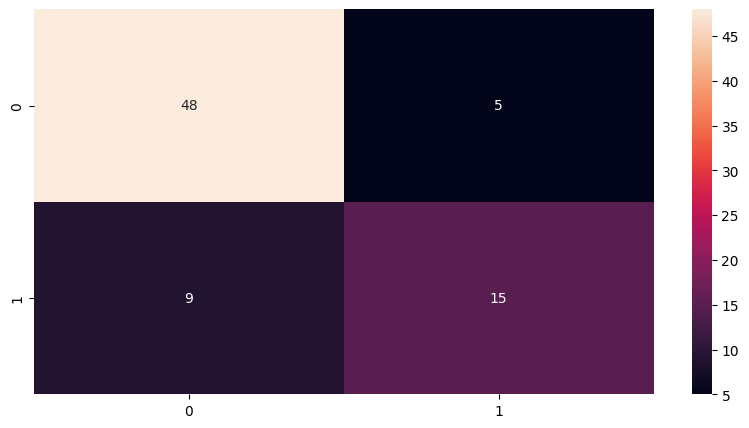

In [47]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

# **2. Decision Tree**

## **Model Training**

In [44]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)


Decision Tree Classifier


DecisionTreeClassifier()

## **Model Evalution**
**Decision Tree Classifier**

In [45]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 70.13 %


Precision: 0.52
Recall: 0.71
------------------------------------------------------------


<Axes: >

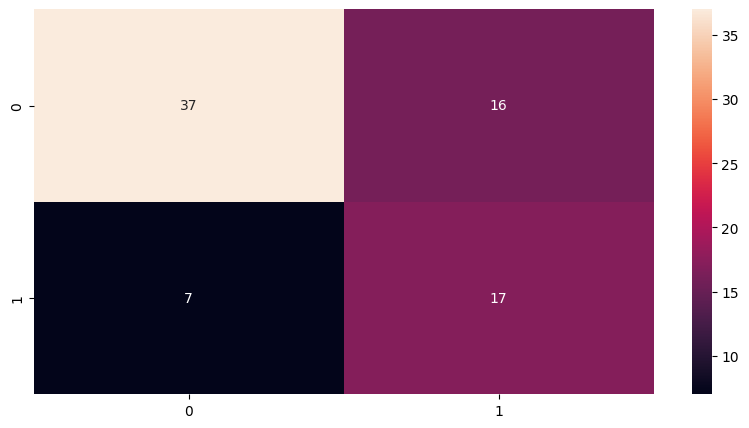

In [46]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)

sns.heatmap(confusion, annot=True, fmt="d")

# **3. Random Forest**

## **Model Training**

In [48]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

## **Model Evaluation**
**Random Forest**

In [49]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 77.92 %


Precision: 0.65
Recall: 0.62
------------------------------------------------------------


<Axes: >

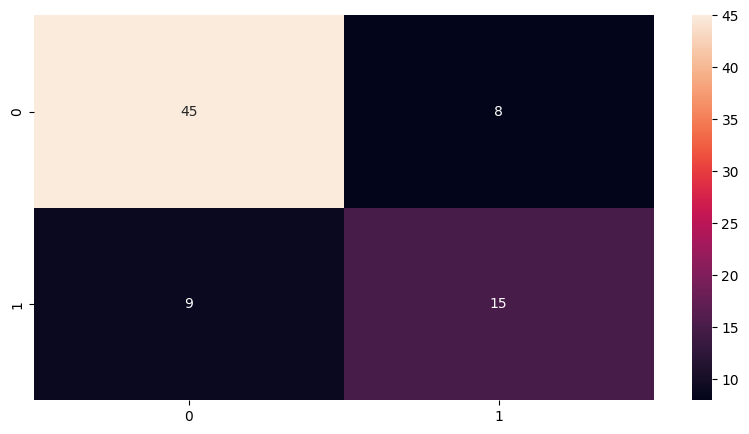

In [50]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

# **4. Gradient Bossting Classifier**

## **Model Training**

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

## **Model Evalution**
**Gradient Boosting**

In [52]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gbc.predict(x_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 74.03 %


Precision: 0.58
Recall: 0.62
------------------------------------------------------------


<Axes: >

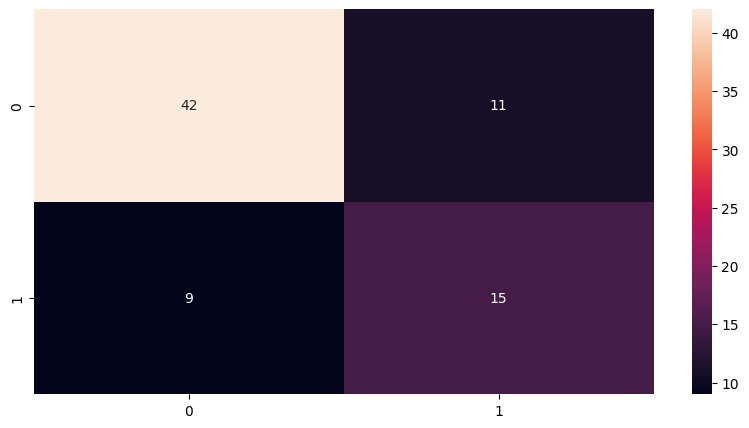

In [53]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(confusion, annot=True, fmt="d")

In [54]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": 81.82,
    "Decision Tree Classifier": 70.13,
    "Random Forest Classifier": 77.92,
    "Gradient Boosting Classifier": 74.03
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Logistic Regression: 81.82
2. Random Forest Classifier: 77.92
3. Gradient Boosting Classifier: 74.03
4. Decision Tree Classifier: 70.13
